# Introduction

La **programmation linéaire** (LP) également connue sous le nom d’optimisation linéaire , est une technique de programmation mathématique permettant d’obtenir le meilleur résultat, comme le profit maximum ou le moindre coût, dans un modèle mathématique dont les exigences sont représentées par des **relations linéaires**.

Nous allons étudier dans cette partie :

- Représentation mathématique d’un problème réel;
- Représentation  et résolution graphique du problème;
- Résolution par la méthode du simplexe;
- Résolution avec un solveur.


# Programme linéaire réels à 2 dimensions

> Une multinationale de bonbons pour les enfants dispose de 2 arômes de base pour la fabrication de ses produits. La saveur de chaque bonbon dépend de la quantité de chaque arôme.
>
> Le premier ingrédient coûte à l’entreprise 10€/kg et le deuxième 20€/kg.
>
> Le coût de fabrication d’un kilo de produit (somme du mélange de 2 ingrédients) est de 5€.
>
> Les études de goût auprès des consommateurs ont montré que la composition du mélange ne doit pas être supérieure à 50% du premier ingrédient et 80% du deuxième.
>
> Par ailleurs, le mois dernier, l’entreprise a vendu 100 Kg à 50€/kg.
>
> L’entreprise ne souhaite produire plus que ce qu’elle arrive à vendre.
>
> Combien de kilos de bonbons doit-elle fabriquer par mois et les proportions de chaque ingrédient pour maximiser les bénéfices ?


## Modélisation du problème

### Variables de décision du programme

> Identifier les inconnues qui sont à déterminer dans le problème.
>
> On les nommera avec des variables $X_1$, $X_2$,…

$X_1 : $ Quantité d'arome 1

$X_2 : $ Quantité d'arome 2

### Contraintes du programme

> Modéliser toutes les contraintes du problème sous formes d'inéquations linéaires sur une ou plusieurs variables du programme linéaire.
>
> À chaque ressource disponible ou à chaque limitation correspondra une inéquation.
>
> Il est important de fixer l’unité (temps, monétaire, …) et de la respecter dans tout le programme linéaire.

- Contrainte 1 : demande maximale par mois

$X_1 + X_2 \leq 100$ (kg)

- Contrainte 2 : règle de composition inférieur à 50% de l’arôme 1

0.5 $X_1 - 0.5 X_2 \geq 0$ (kg)

- Contrainte 3 : règle de composition inférieur à 80% de l’arôme 2

-0.8 $X_1 + 0.2 X_2 \geq 0$ (kg)

- Contraintes de non-négativité (nombre de kgs/mois positifs)

$X_1 \geq 0$ (kg)
$X_2 \geq 0$ (kg)

### Fonction économique

La fonction économique doit maximiser le **bénéfice** (prix de vente des bonbons - coût des matières premières et de fabrication).

> Exprimer la fonction économique $F(X_1,X_2)$

$F (X_1, X_2) = (X_1 + X_2 )* 50 - (X_1 * 10 + X_2 * 20 + 5*(X_1 + X_2))$

reformulée en

$F (X_1, X_2) = 35X_1 + 25X_2

## Programme linéaire complet

On obtient le système linéaire complet :

$$
\text{Maximiser : }  35X_1 + 25X_2 \qquad
\text{   sous contrainte : }\qquad
\begin{cases}
X_1 + X_2 & \leq 100\\
0.5X_1 - 0,5X_2 & \geq 0\\
-0,8X_1 + 0,2X_2 & \geq 0\\
X_1 & \geq 0 & \\
 X_2 & \geq 0
\end{cases}$$


# Méthode graphique de résolution

La méthode graphique ne peut être réalisée qu’avec un programme de base comportant au plus 3 inconnues. Au-delà, la représentation et la résolution deviennent impossible.

L’idée est de représenter les inéquations de contraintes et la fonction économique dans un plan ou dans l'espace.


## Représentation des contraintes

Commençons par placer les différentes contraintes. Nous allons laisser en blanc la partie solution de notre problème.

On place généralement la contrainte $X_1$ en abscisse, $X_2$ en ordonnée.

> Après avoir importé `numpy` et `matplotlib`, tracer les droites correspondantes aux contraintes dans la partie du plan $X_1 \geq 0,X_2 \geq 0$.
>
> On pourra utiliser les fonctions `linesapce`, `amax`, `xlim`, `ylim`.


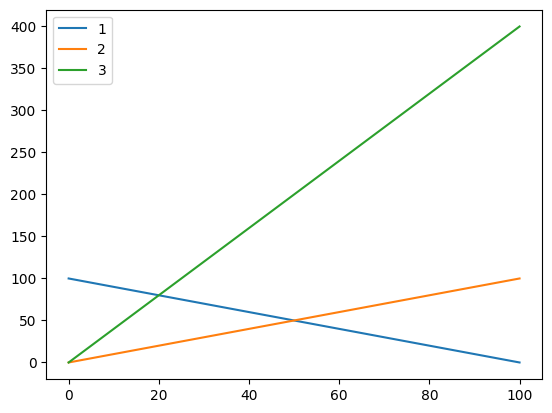

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# graphique avec les 3 contraintes
x = np.linspace(0, 100)

plt.plot(x, 100-x, label='1')
plt.plot(x, x, label='2')
plt.plot(x, 4*x, label='3')
plt.legend()
plt.show()




Ce que nous voulons, c'est tracer le domaine délimité par une inéquation. Il faut donc faire ressortir la zone des valeurs respectant les inégalités.

il suffit pour cela d'utiliser `fill_between` en laissant la partie solution en blanc.

> Compléter votre graphique précédent


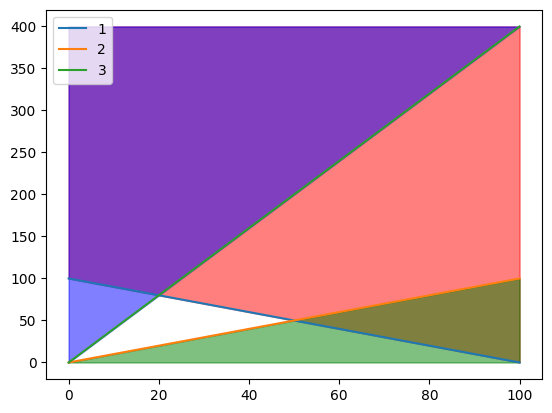

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# graphique avec les 3 contraintes
x = np.linspace(0, 100)

plt.plot(x, 100-x, label='1')
plt.plot(x, x, label='2')
plt.plot(x, 4*x, label='3')
plt.legend()

# avec fill_between trace les zones a exterieur des courbes
plt.fill_between(x,100-x,400, color='red', alpha=0.5)
plt.fill_between(x,x,0, color='green', alpha=0.5)
plt.fill_between(x,4*x,400, color='blue', alpha=0.5)




La partie en blanc est l'espace des **solutions réalisables.**

Toutes les valeurs de $(X_1, X_2)$ respectant les contraintes sont dans cet espace.

Dans le cas d'un problème à 2 dimensions, c'est un **polygone convexe** borné par des droites.

On admet que :

> **Théorème :** Soit $f$ une fonction linéaire définie sur un polyèdre convexe borné.
>
> Alors la fonction $f$ atteint sa valeur **maximale** en au moins un des **sommets** du polyèdre convexe.

## Fonction économique

Nous allons pouvoir utiliser cette propriété pour définir la solution optimale.

La forme générale de la fonction économique est celle d'une droite d'équation $ax +by = p$.

> Le but est ici de **maximizer** $p$ avec ($x,y$) restant dans le domaine des contraintes.

Ici, on obtient $35x + 25y =p$ soit $y=-\dfrac{35}{25}x+\dfrac{p}{25}$

> Tracer la fonction économique pour obtenir un bénéfice de 1000, 2000, 3000, 4000 euros.

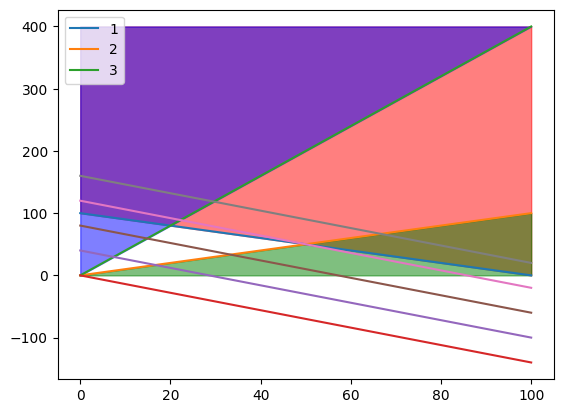

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# graphique avec les 3 contraintes
x = np.linspace(0, 100)

plt.plot(x, 100-x, label='1')
plt.plot(x, x, label='2')
plt.plot(x, 4*x, label='3')
plt.legend()

# avec fill_between trace les zones a exterieur des courbes
plt.fill_between(x,100-x,400, color='red', alpha=0.5)
plt.fill_between(x,x,0, color='green', alpha=0.5)
plt.fill_between(x,4*x,400, color='blue', alpha=0.5)

x = np.linspace(0, 100)
plt.plot(x, -35/25*x + 0/25)
plt.plot(x, -35/25*x + 1000/25)
plt.plot(x, -35/25*x + 2000/25)
plt.plot(x, -35/25*x + 3000/25)
plt.plot(x, -35/25*x + 4000/25)
plt.show()






> Quelles conclusions pouvez-vous tirer de ces tracés ?

$\dots$


# Méthode du simplexe

Une société produit de la peinture d’intérieur et d’extérieur à partir de deux produits de base M1 et M2.

$$\begin{array}{|c|c|c|c|}
\hline
& \text{Extérieure} & \text{Intérieure} & \text{Quantité disponible par tonne par jour} \\
\hline
M1 &6 &4 &24 \\
\hline
M2 &1 & 2& 6 \\
\hline
\text{Profit par tonne} &5 &4& \\
\hline
\end{array}
$$

Les contraintes supplémentaires s'appliquent :

* Demande maximum en peinture d’intérieur : 2 tonnes / jour.

* La production en peinture d’intérieur ne peut dépasser que d’une tonne celle d’extérieur.

> Exprimez le programme linéaire complet.

$x_1 : \dots$

$x_2 : \dots$

La fonction objectif à optimiser est :

$$\text{max } z = \dots $$

sous les contraintes :

$$\begin{cases}
\dots \\
\dots \\
\dots \\
\dots \\
\dots \\
\end{cases}
$$


> Donner **une** solution qui satisfait toutes les contraintes.

$$x_1 =\dots , x_2 =\dots  \text{ qui implique } z= \dots $$

> Combien y-a-t'il de solutions ?

$\dots$

L'objectif est de trouver la solution (admissible) **optimale**.

## Forme standard et forme canonique d’un programme linéaire

### Forme standard

**Définition :** Un programme linéaire est sous forme standard lorsque toutes ses contraintes sont des **égalités** et toutes ses variables sont **non-négatives**.

### Forme canonique

**Définition :** Un programme linéaire est sous forme **canonique** lorsque toutes ses contraintes sont des **inégalités** et toutes ses variables sont **non-négatives**.

### Equivalence entre ces formes

**Théorème :** Tout programme linéaire peut s’écrire sous forme standard et sous forme canonique.

Passons notre problème de pots de peinture sous forme standard en introduisant des **variables d'écart positives**.

$$\begin{cases}
6x_1+4x_2 &\leq 24 \\
 x_1+2x_2 &\leq 6 \\
 x_2 &\leq 2 \\
 x_2−x_1 &\leq 1\\
x_1,x_2 &\geq 0\\
\end{cases}
$$
$\implies$
$$\begin{cases}
\cdots \\
\cdots \\
\cdots \\
\cdots \\
x_1,x_2,s_1,s_2,s_3,s_4 \geq 0\\
\end{cases}
$$

Nous pouvons alors donner une forme matricielle à ce problème

$$A.x=b \text{ avec } $$

$$A=\begin{pmatrix} 6 &4 &1 &0 &0& 0 \\ 1 &2 &0& 1& 0& 0 \\ 0 &1& 0& 0& 1& 0 \\ -1 &1 &0&0&0&1\\ \end{pmatrix}
\text{ et } x=\begin{pmatrix} x_1 \\ x_2 \\ s_1 \\ s_2 \\ s_3 \\ s_4 \end{pmatrix} b=\begin{pmatrix} 24 \\6\\2\\1 \end{pmatrix}
c=\begin{pmatrix} 5 \\4 \\0\\0\\ 0\\ 0 \end{pmatrix}$$

> Ci-dessous, nous avons une représentation graphique du problème.

![graphique1](graphique1.png)

> Repérer rapidement chaque contrainte sur ce schéma.

![graphique2](graphique2.png)

## Solutions de base

On obtient donc un système de $m$ équations linéaires à $n$ inconnues $(m < n)$ ce qui implique une infinité de solutions.

- Si on fixe à **zéro** $n − m$ variables, le système de $m$ équations à $m$ inconnues possède une solution unique (si la matrice est inversible). C’est une **solution de base**.

**Définition** : Une **solution de base** d’un programme linéaire est la solution unique du système de $m$ équations à $m$ inconnues obtenu en fixant à zéro $n − m$ variables (pourvu que la matrice du système soit inversible).

Les variables fixées à zéro sont appelées **variables hors base** et les autres **variables en base**.

Prenons $B = \{s_1, s_2, s_3, s_4\}$ les variables en base donc $(x_1, x_2)$ les variables hors base fixée à 0.



$$\begin{cases}
z &= 0 +5x_1 +4x_2 \\
s_1 &= 24 −6x_1 −4x_2 \\
s_2 &= 6 −x_1 −2x_2 \\
s_3 &=2 −x_2 \\
s_4 &= 1 +x_1 −x_2 \\
\end{cases}
$$

Si $x_1 = x_2 = 0$, alors $s_1 = 24, s_2 = 6, s_3 = 2, s_4 = 1$.

Cette solution de base réalisable correspond au sommet (0, 0).

Toutes ces valeurs sont non-négatives et la solution est réalisable.

**Définition :** Une solution de base telle que toutes les variables prennent des valeurs non-négatives est appelée **solution de base réalisable**.

### Géométrie des solutions de base

Chaque solution de base réalisable correspond à un sommet du polygone des contraintes.

![graphique3](graphique3.png)

|       Base       | Solution | Objectif | Sommet |
| :--------------: | :------: | :------: | :----: |
| {s1, s2, s3, s4} |  (0, 0)  |    0     |   A    |
| {s1, x1, s3, s4} |  (4, 0)  |    20    |   F    |
| {x1, s2, s3, s4} |  (6, 0)  |    -     |   -    |
| {x1, x2, s3, s4} | (3, 1.5) |    21    |   E    |

# L’algorithme du simplexe

On commence par donner les idées principales de cet algorithme avant de systématiser.

## Choix de la variable entrante dans la base

$$\begin{cases}
z &= 0 +5x_1 +4x_2 \\
s_1 &= 24 −6x_1 −4x_2 \\
s_2 &= 6 −x_1 −2x_2 \\
s_3 &=2 −x_2 \\
s_4 &= 1 +x_1 −x_2 \\
\end{cases}
$$

Si $x_1$ augmente (entre en base), la valeur de la fonction objectif $z$ augmente.

Quelle est la valeur maximale de $x_1$ sachant que toutes les variables doivent **rester positives**.

$$\begin{cases}
z &= 0 +5x_1 +4x_2 \\
s_1 & \geq 0 &\implies \cdots\\
s_2 & \geq 0 & \implies \cdots  \\
s_3 & \geq 0 & \implies \cdots\\
s_4 & \geq 0 & \implies \cdots  \\
\end{cases}
$$

On doit donc choisir

$$x_1=\dots$$

Dans ce cas $$s_1=\dots$$

donc $x_1$ entre en base et $s_1$ sort de la base.

La nouvelle base est donc $B=\{x_1,s_2,s_3,s_4\}$.

Passons à l'étape de pivotage sous forme d'équation :

$$x_1 = 4 − \dfrac16 s_1 − \dfrac23 x_2$$

$$\begin{cases}
z &= 20 −\dfrac56 s_1 +\dfrac23 x_2\\
x_1 &= 4 − \dfrac16 s_1 − \dfrac23 x_2\\
s_2 &= 2 +\dfrac16 s_1 −\dfrac 43 x_2\\
s_3 &=2 -x_2\\
s_4 &= 5 −\dfrac16 s_1 −\dfrac53 x_2 \\
\end{cases}
$$

Reprenons notre système initial sous la forme d'une matrice augmenté pour comprendre le pivotage par la méthode de Gauss-Jordan

$$\begin{cases}
6x_1+&4x_2 &+ s_1& & & &=24 \\
x_1+&2x_2 & &+s_2 & & &= 6 \\
 &x_2 &  & & +s_3& &= 2 \\
 -x_1+ &x_2& & & & +s_4 &= 1\\
x_1,&x_2,&s_1,&s_2,&s_3,&s_4& \geq 0\\
\end{cases}
$$

donne sous forme de matrice augmentée :

$$A= \begin{pmatrix}  6&4&1&0&0&0& 24   \\ 1&2&0&1&0&0&6 \\ 0&1&0&0&1&0&2 \\-1&1&0&0&0&1&1 \\ \end{pmatrix}$$

Pour entrer $x_2$ dans la base, on peut choisir comme pivot $a_{3;2}$

$$A= \begin{pmatrix}  6&4&1&0&0&0& 24   \\ 1&2&0&1&0&0&6 \\ 0&\red 1&0&0&1&0&2 \\-1&1&0&0&0&1&1 \\ \end{pmatrix}$$


On applique la transformation de Gaus-Jordan en utilisant ce pivot :

$L_4 \leftarrow L_4 - L_3$

$L_2 \leftarrow L_2 - 2 L_3$

$L_1 \leftarrow L_1 - 4 L_3$

et on obtient :

$$A= \begin{pmatrix}  6&0&1&0&-4&0& 16   \\ 1&0&0&1&-2&0&2 \\ 0&\red 1&0&0&1&0&2 \\-1&0&0&0&-1&1&-1 \\ \end{pmatrix}$$

Après cette étape $x_1$ est entrée de la base et $s_2$ est sortie. On a donc $B=\{x_1,s_1,s_3,s_4\}$.

En fixant les variable hors base à 0, $x_2=s_2=0$

On obtient $$x_1=-6 ; s_1=12 ; s_3=-2; s_4=-7$$

## Exemple guidé

Nous allons illustrer cette méthode  sur l’exemple guidé suivant :

$$\text{max } z = x_1 + 2x_2 \qquad \text{ sous les contraintes } \qquad
\begin{cases}
2x_1 + x_2 \leq 2 \\
x_1+3x_2 \leq 3 \\
x_1,x_2 \geq 0
\end{cases}$$

> Ecrire le système sous sa forme canonique.

$$\text{max } z = x_1 + 2x_2 \qquad \text{ sous les contraintes } \qquad
\begin{cases}
\dots \\
\dots\\
x_1,x_2, x_3, x_4 \geq 0
\end{cases}$$

 ### Initialisation

On choisit la solution de base admissible $(0, 0, 2, 3)$ comme point de départ de l’algorithme. 

Les variables de base sont $\{x_3, x_4\}$ et les variables hors-base sont $\{x_1, x_2\}$. Ce choix est toujours possible si b ≥ 0.

> Former la matrice augmentée initiale $T$.

$$T=\begin{pmatrix} \cdot&\cdot&\cdot&\cdot&\cdot \\&&&&  \end{pmatrix} \begin{matrix} x_3 \\ x_4 \end{matrix}$$

### Choix de la colonne de pivot

On doit aller vers un sommet adjacent pour lequel la valeur de la fonction objective $z$ en ce sommet est supérieure.

Pour cela, on choisira la variable $x_i$ qui fera augmenter le plus rapidement $z$. C’est-à-dire que l’on choisit l’indice $i$ qui maximise  $c_i > 0$.

Dans notre cas, la fonction $z$ varie plus rapidement en fonction de la variable $x_2$.

Donc, on choisit la deuxième colonne comme colonne de pivot. La variable $x_2$ entre dans la base mais une variable doit sortir.

**Remarque** : Si tous les $c_i \leq 0$, la fonction objective $z$ ne peut augmenter davantage. Donc nous avons trouver la solution optimale et l’algorithme se termine à cette étape.

### Choix de la ligne de pivot

Il y a 2 possibilités de nouvelles base:$\{x_2, x_3\}$ et $\{x_2, x_4\}$.

Essayons le choix $B=\{x_2, x_4\}$. Dans ce cas, $x_3$ quitte la base.

La solution de base s’obtient à l’aide de l’élimination de Gauss-Jordan à partir du pivot $a_{1;2}$. On obtient

$$\begin{pmatrix} 2&\red 1&1&0&2 \\1&3&0&1&3  \end{pmatrix} \rightarrow  \begin{pmatrix} \cdot&\cdot&\cdot&\cdot&\cdot \\\cdot&\cdot&\cdot&\cdot&\cdot \\ \end{pmatrix}$$

et la nouvelle solution de base sera $\qquad \cdots \qquad$ qui n’est pas admissible.

Essayons de nouveau avec $B=\{x_2, x_3\}$. $x_4$ quitte donc la base.

La solution de base s’obtient à l’aide de l’élimination de Gauss-Jordan à partir du pivot $a_{2;2}$. On obtient :

 $$\begin{pmatrix} 2&1&1&0&2 \\1&\red 3&0&1&3  \end{pmatrix} \rightarrow  \begin{pmatrix} \cdot&\cdot&\cdot&\cdot&\cdot \\\cdot&\cdot&\cdot&\cdot&\cdot \\ \end{pmatrix}$$

La nouvelle solution de base sera $\qquad \cdots \qquad$ qui est admissible.

On obtient dans ce cas $z=2$.

On peut continuer comme ceci, mais voyons d'abord quelques remarques.

* Il est évident que nous ne pouvons nous permettre d’explorer toutes les possibilités pour le choix de la ligne de pivot à l’étape 2.
  Nous avons besoin d’un critère de sélection.

* Il serait intéressant de stocker la fonction objectif dans la matrice pour faciliter son calcul.

## Résumons l'algorithme du simplexe

**Etape 0 :** On commence par former le tableau initial.

**Etape 1 :** On choisit la colonne $j$ du pivot telle que

$$c_j=max\{ c_i | c_i >0\}$$

Si aucun choix est possible, on a atteint la solution optimale et l’algorithme se termine.

Sinon, on passe à l’étape suivante.

Remarque : pour un problème de minimisation, on modifie le critère en choisissant l’indice $j$ tel que $c_j= min\{c_i | c_i<0\}$

**Etape 2 :**

On choisit la ligne du pivot. On choisit l'indice $i$ qui vérifie le **critère du quotient**

$$\dfrac{b_i}{a_{ij}}=min\{\dfrac{b_k}{a_{kj}} | a_{kj}>0 \}$$

ou $j$ est la colonne du pivot précédente.

**Etape 3 :** On applique la procédure d’élimination de Gauss-Jordan autour du pivot situé à l’intersection de la ligne $i$ et de la colonne $j$.

On retourne à l'étape 1 et on recommence.

Remarque : le critère du quotient permet de toujours choisir une solution admissible.

# Exercice guidé

Considérons le problème :

$\text{max } z= 20x_1+ 25x_2$ sous les contraintes

$$\begin{cases}
2x_1+ 3x_2 \leq 40,\\
4x_1+ 2x_2 \leq 48,\\
x_1, x_2 \geq 0.\\
\end{cases}$$

que l'on réécrit sous forme canonique :

$$\begin{cases}
2x_1+ 3x_2 + x_3 = 40,\\
4x_1+ 2x_2  +x_4 = 48,\\
x_1, x_2, x_3,x_4 \geq 0.\\
\end{cases}$$

On forme le tableau initial T :

$$\begin{array}{|c|cccc|c|}
\hline
 B & x_1 &x_2 & x_3 & x_4 & \\
 \hline
 x_3&2&3&1&0& 40\\
 x_4& 4&2&0&1&48  \\
 \hline
 & 20 &25&0&0&0 \\
 \hline
 \end{array}$$

Les variables de base sont $B=\{x_3, x_4\}$ et la solution de base est $(0,0,40,48)$ ce qui correspond à l’origine dans le plan.

**Etape 1** : choix de la colonne : $\dots$     La variable $\dots$ entre dans la base.

**Etape 2** : choix de la ligne par le critère du quotient qui assure une solution admissible.

$$\begin{array}{|c|cccc|c|c|}
\hline
 B & x_1 &x_2 & x_3 & x_4 &  & critère\\
 \hline
 x_3&2&\red 3&1&0& 40 & \dots\\
 x_4& 4&\red 2&0&1&48  & \dots\\
 \hline
 & 20 &25&0&0&0  & \\
 \hline
 \end{array}$$

le choix de la ligne est $\dots$ donc la variable $\dots$ sort de la base.

On pivote autour de $\dots$

$$\begin{array}{|c|cccc|c|}
\hline
 B & x_1 &x_2 & x_3 & x_4 & \\
 \hline
 \dots&\dots&\dots&\dots&\dots& \dots\\
 \dots&\dots&\dots&\dots&\dots& \dots\\
 \hline
 & \dots &\dots&\dots&\dots&\dots \\
 \hline
 \end{array}$$


On recommence  :

On choisit la colonne 1 comme pivot (pourquoi ?) et le critère des quotients donne la ligne 2 donc $x_1$ rentre dans la base et $x_4$ en sort.

$$\begin{array}{|c|cccc|c|c|}
\hline
 B & x_1 &x_2 & x_3 & x_4 & & \text{critère}\\
 \hline
 x_2&2/3&1&1/3&0& 40/3 & \dots \\
 x_4& 8/3&0&-2/3&1&64/3  & \dots\\
 \hline
 & 10/3 &0&-25/3&0&-1000/3 &\\
 \hline
 \end{array}$$

On pivote autour de $T_{2,1}$

$$\begin{array}{|c|cccc|c|}
\hline
 B & x_1 &x_2 & x_3 & x_4 & \\
 \hline
 x_2&0&1&1/2&-1/4& 8\\
 x_1& 1&0&-1/4&3/8&8  \\
 \hline
 & 0&0&-15/2&-5/4&-360 \\
 \hline
 \end{array}$$

L’algorithme se termine ici car $\dots$

La solution optimale sera  :

$$ x_1=\dots,x_2=\dots, x_3=\dots, x_4=\dots \text{ et }  z=\dots$$

## Avec un solveur

Nous utilisons la bibliothèque  python `pulp`.

Voici un exemple simple d'utilisation ci dessous.

In [ ]:
# import the library pulp as p
import pulp as p

# Create a LP Minimization problem
Lp_prob = p.LpProblem('Problem', p.LpMaximize)

# Create problem Variables
x = p.LpVariable("x", lowBound = 0)   # Create a variable x >= 0
y = p.LpVariable("y", lowBound = 0)   # Create a variable y >= 0

# Objective Function
Lp_prob += 20*x +  25*y

# Constraints:
Lp_prob += 2 * x + 3 * y <= 40
Lp_prob += 4*x + 2*y <= 48


# Display the problem
print(Lp_prob)

status = Lp_prob.solve()   # Solver
print(p.LpStatus[status])   # The solution status

# Printing the final solution
print(p.value(x), p.value(y), p.value(Lp_prob.objective))

## A la main en Python

> Quelle est la structure du matrice de simplexe si le sommet 0 est une solution ?

$$\begin{pmatrix} . & . \\ . & . \end{pmatrix}$$

$\text{max }  z = 4x_1 + 5x_2$

sous les contraintes :

$$\begin{cases}
2x_1 + x_2 & \leq 800 \\
x_1 + 2x_2 & \leq 700 \\
x_2 & \leq 300 \\
x_1, x_2 & \geq 0
\end{cases}$$

Sous la forme matricelle, avec :

$$A = \dots $$

$$z= \dots $$

$$b= \dots $$

> A l'aide de la fonction `block` de `numpy`, écrire la matrice du simplexe qui correspond au système sous contraintes :

In [ ]:
import numpy as np

> Ecrire une fonction `pivot(M,i,j)` qui permet de pivoter autour de $M_{i,j}$

In [ ]:
# la fonction pivot
def pivot(M,i,j):
# M est une np.array (2 dimensions)
# i indice de la ligne
# indice de la colonne
    N = M.copy ()
    # compléter
    return N

> Ecrire une fonction permettant de choisir la colonne du pivot.

In [ ]:
def colonne(matrice):
    pass

Ecrire une fonction permettant de choisir la ligne du pivot.

In [ ]:
def ligne(matrice, col):
    pass

Ecrire une fonction permettant d'obtenir le crière d'arrêt de cet algorithme.

In [ ]:
def arret(matrice):
    pass

> Ecrire une fonction simplexe qui permet de dérouler l'algorithme du simplexe

In [ ]:
def simplexe(matrice):
    pass

Vérifier avec `pulp`.

In [ ]:
# import the library pulp as p
import pulp as p

> Vérification graphique :
>
> * Tracer les zones de contrainte en laissant en blanc la partie solution.
> * Tracer la fonction objectif pour z=1000 et z=2200
> * Retrouver alors la solution optimale

In [ ]:
import numpy as np
import matplotlib.pyplot as plt